<a href="https://colab.research.google.com/github/ray1stsa/DataSciencePortfolio/blob/main/DSNDProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding and Data Understanding**

Brief Description:

This project explores the factors that contribute to the success of video games, focusing on predicting Meta Scores and analyzing key features such as platform, release date, and user reviews. The goal is to provide actionable insights for stakeholders to improve decision-making regarding game development and marketing.

first of all, we have to import our data and give a quick look at it, so we can derive questions that would help the business entities for their work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('all_games.csv')
data

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


we begin checking our dataset features datatypes, know if there are any missing data that might cause trouble to us, thus we will begin work with this the following two functions that would give us a brief overview of the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [4]:
data.describe()

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


# after giving a quick look for the data, we can now determine few business questions behind it, which of these are :

1. *What factors contribute the most to the success of a game?*



-- We aim with this question is to identify the features or aspects of a game (such as platform or release date) that are most correlated with high user ratings or meta scores.




2. *How does the release platform affect the game's success?*



-- The goal here is to examine if games on certain platforms tend to perform better (higher Meta Scores and User Reviews) than others.





3. *Does the release date affect the game's performance in terms of Meta Score and User Review?*



-- With this question, we are seeking to explore if games released in certain years or time periods perform better compared to others.



---


now Enough with questions, let us start answering it! getting started prepare our data to answer our questions with the power of analyzing the data + visualizing it, starting first with dealing the data that could corrupt our work, such the categorical and missing data.



---

starting now with the 'release date' column, 'release date' is on an format of Object, thus we will change it to datetime format



In [5]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')



---



Now dealing with the categorical data:
The 'platform' column contains categorical values representing different gaming platforms. These will be encoded using techniques like One-Hot Encoding for analysis.

In [6]:
data['platform'].str.strip()
platform_dummies = pd.get_dummies(data['platform'], prefix='platform')

In [7]:
platform_dummies = platform_dummies.astype(int)

In [8]:
platform_dummies

,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,platform_ PSP,platform_ PlayStation,platform_ PlayStation 2,...,platform_ PlayStation 5,platform_ PlayStation Vita,platform_ Stadia,platform_ Switch,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the reason behind taking the platform columns and strip it into different separate columns is to make the dataset contains features that could work for almost every machine learning task, i did the one-hot encoding as 1 for presence of a game in a certain column that represent a platform and 0 for absence of the game in that platform, this would also make our data more easily understood to everyone.

in addition to that, we also used the one hot encoding to turn the True or False values into 1 and 0, so we can use these for our machine learning tasks

In [9]:
data['user_review']= pd.to_numeric(data['user_review'], errors='coerce')
data['meta_score']= pd.to_numeric(data['meta_score'], errors='coerce')

turning the user_review and meta score to numeric values to ensure that it is being a numeric to make our work goes without any errors

In [10]:
data_prep = pd.concat([data, platform_dummies], axis=1)

the separated platforms columns is not in the dataset yet, thus we concatenate it to the original dataset

In [11]:
data_prep = data_prep.drop(['platform', 'summary'], axis=1)

here we eliminated the platform and summar columns, do you wanna know why?  

1. platform column is no needed since we stripped all its values into seperated columns, so it would trouble us, thus eliminating it is much better
2. summary column contains the info about the game, in our analysis, it is unnecessary to have, we cannot have any usage for it, thus, eliminating it is also a great option

In [12]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

In [13]:
data_prep['user_review'].dropna(inplace=True)

Now, we are gonna do our analysis after we prepared the data in a good way, by turning our categorical data into numerical, eliminating the unnecesarry data such as the 'summary' column,


Now we can explore correlations between platforms, release dates, and game success of which will be measured by 'meta_score' and 'user_review'.

In [14]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

In [15]:
data_prep['release_year'] = data_prep['release_date'].dt.year
data_prep['release_quarter'] = data['release_date'].dt.quarter
avg_meta_score_by_year = data_prep.groupby('release_year')['meta_score'].mean()
avg_meta_score_by_quarter = data_prep.groupby('release_quarter')['meta_score'].mean()

in our analysis and to answer our questions, the release date is not sufficient enough to calculate the averages meta scores for a year quarter or even a release year, so we will create new columns to represent the quarters and the years of game releases, taking the average of each of them and visualize it so nicely

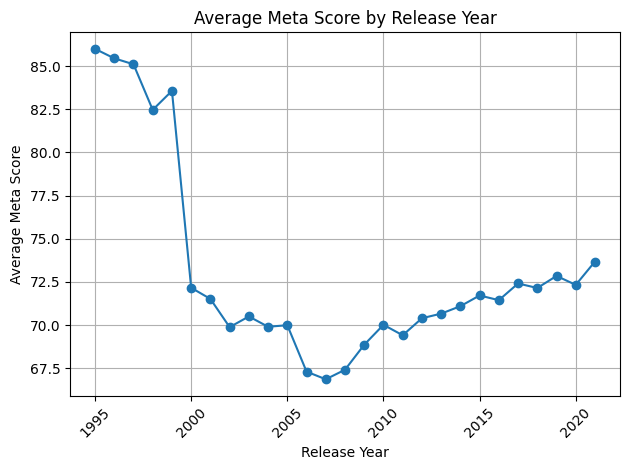

In [16]:
# Line plot for average meta score by release year
plt.plot(avg_meta_score_by_year.index, avg_meta_score_by_year.values, marker='o')
plt.title('Average Meta Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Meta Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization shows the trend of the average Meta Score by release year. This provides insight into how games' quality (based on Meta Scores) has evolved over time, which helps address the question of whether release date affects game performance.



Now let us start analyzing the impact of the platform on game success by comparing the average Meta Scores across different platforms.

<ipython-input-17-cbfe4c0b89e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_quarter', y='meta_score', data=avg_meta_score_by_quarter, palette=colors)


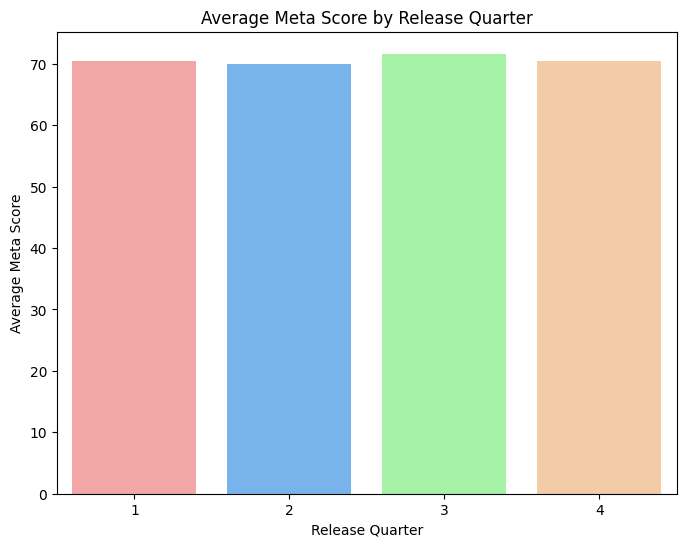

In [17]:
avg_meta_score_by_quarter = data_prep.groupby('release_quarter')['meta_score'].mean().reset_index()

plt.figure(figsize=(8, 6))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
sns.barplot(x='release_quarter', y='meta_score', data=avg_meta_score_by_quarter, palette=colors)
plt.title('Average Meta Score by Release Quarter')
plt.xlabel('Release Quarter')
plt.ylabel('Average Meta Score')
plt.show()

In [18]:
platform_columns = [col for col in data_prep.columns if col.startswith('platform_')]
avg_meta_score_by_platform = data_prep[platform_columns + ['meta_score']].groupby(platform_columns).mean()

# Reshaping data for bar plot
avg_meta_score_by_platform = avg_meta_score_by_platform.reset_index()
avg_meta_score_by_platform = avg_meta_score_by_platform.melt(id_vars='meta_score', var_name='Platform', value_name='Present')
avg_meta_score_by_platform = avg_meta_score_by_platform[avg_meta_score_by_platform['Present'] == 1]


here we will do an avg meta score by platform, so we can see which platform has great games with nice meta scores.

<ipython-input-19-a70f3d63ac18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='meta_score', y='Platform', data=avg_meta_score_by_platform, palette='Blues_d')


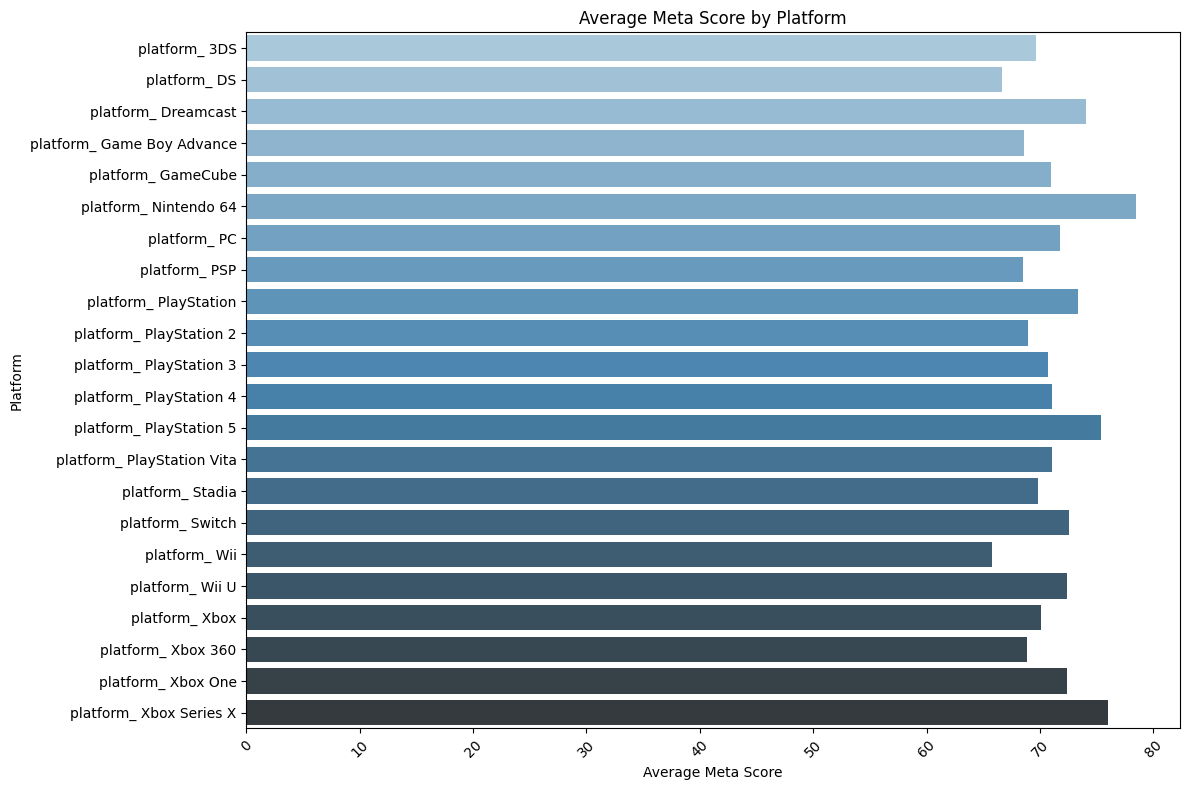

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='meta_score', y='Platform', data=avg_meta_score_by_platform, palette='Blues_d')
plt.title('Average Meta Score by Platform')
plt.xticks(rotation=45)
plt.ylabel('Platform')
plt.xlabel('Average Meta Score')
plt.tight_layout()
plt.show()

<ipython-input-20-6a917f0f836a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_review', y='platform', data=avg_user_review_by_platform, palette='Blues_d')


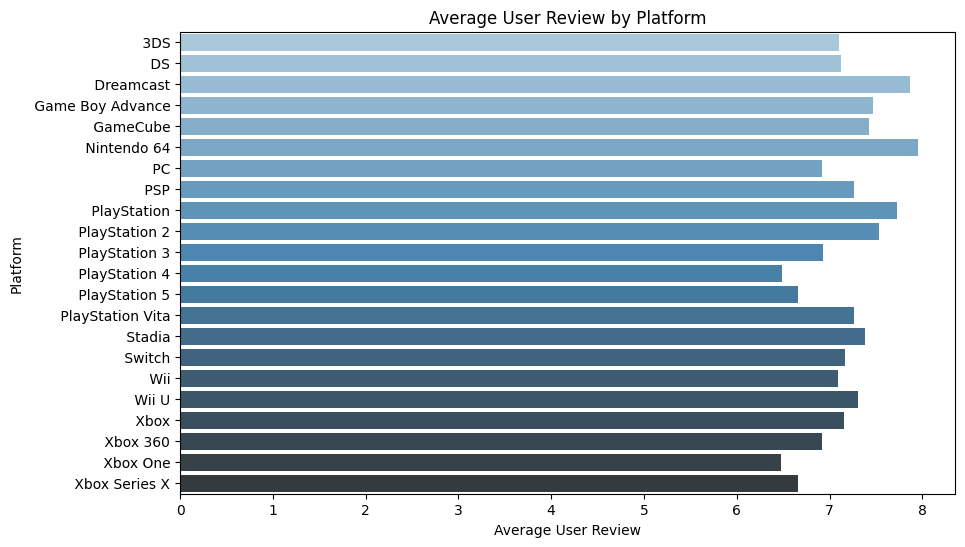

In [20]:
data = data.dropna(subset=['user_review'])
avg_user_review_by_platform = data.groupby('platform')['user_review'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='user_review', y='platform', data=avg_user_review_by_platform, palette='Blues_d')
plt.title('Average User Review by Platform')
plt.xlabel('Average User Review')
plt.ylabel('Platform')
plt.show()

here we applied the same concept, but on user reviews, the audience of games is not for reviewers of games, it also goes primarily to the players, which their voice is really important, cuz they are those who determine the success of the games

as we did eariler our ***data understanding and data preparation*** to analyze the data and virtualize it to answer our questions, From this data and the analysis conducted, we gathered several key insights about the factors influencing a game's success, primarily based on Meta Scores, platform, and release timing. Here's a summary of what we understood from the data:

# **Key Insights from the Data**
1. Platform Matters, but Expectations Are Key:

Contrary to common expectations, high-performance platforms like PlayStation and Xbox do not always guarantee higher Meta Scores. This is likely because games on these platforms come with higher expectations from both critics and players.
Classic platforms such as Nintendo 64 and Dreamcast have shown higher average Meta Scores, which may be due to the legacy and iconic games associated with them, despite having fewer total releases.
The complexity and competition on modern high-performance platforms mean that even small technical issues or lack of innovation can lead to harsher reviews.

2. Release Timing Influences Performance:

Games released in Q3 (July to September) tend to perform better in terms of Meta Scores compared to those released in Q4 (October to December).
Q4 releases face intense competition during the holiday season, which often results in less critical attention and sometimes rushed reviews. Games in Q3 benefit from a less crowded market, allowing them to gain more focused attention from critics.
This finding suggests that the timing of a game's release is an important factor in determining its success.

3. User Reviews Align with Critical Scores, but Not Always:

While Meta Scores and User Reviews often align, they do not always follow the same pattern. Critics tend to focus on technical aspects, graphics, and innovation, while players often rate games based on enjoyment, playability, and personal experience.
Games may receive high User Reviews even when they have relatively lower Meta Scores, indicating that player satisfaction can differ from critical evaluation.







---



---
**Data Modeling**

now in the era of the AI, we can say that many video game development studios and companies might need some predictive models to improve their business work,

Choosing the machine learning model depends on what the customer's plans for their future work, for instance if the goal is to predict Meta Scores or User Reviews based on the available features, a regresion model would be the best option.

If the goal is to classify games into high-rated and low-rated categories, then a classification model would be more appropriate.

If your focus is on predicting Meta Scores or User Reviews over time (e.g., forecasting how the game industry is evolving), you could treat the release date as a time series feature and use the ARIMA or SARIMAX models.


the best model we can implement for this dataset based on its structure And its complexity of the interactions and the goals of our analysis, the XGBoost for both regression and classification is the best one



For Classification tasks : XGBoost can handle the non-linear relationships between features like platform, release date, and the target variable (high or low Meta Score). It’s known for its efficiency and high performance, especially in structured datasets like this one.

For Regression : XGBoost also works well in regression tasks and can capture complex relationships between features. It performs better than simpler models like linear regression because it can model interactions between features and learn non-linear patterns.

and since this, i will simply do a regression model using XGBoost regressor to predict the meta scores of te upcoming games based on the features.

In [21]:
data_prep['release_year'] = data_prep['release_date'].dt.year
data_prep['release_month'] = data_prep['release_date'].dt.month
data_prep['release_day'] = data_prep['release_date'].dt.day

to make our work easier and to use the release date of the games in a better way rather than using it in a troublesome format such as datetime, we will take the year, month and day and convert it to separate columns so it can make our work more better, XGBoost cannot deal with datetime format, and XGBoost is the best option for our complex dataset, thus we implemented all of this

In [22]:
data_prep

,name,release_date,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,1998-11-23,99,9.1,0,0,0,0,0,1,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,2000-09-20,98,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,2008-04-29,98,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,1999-09-08,98,8.4,0,0,1,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,2008-04-29,98,7.9,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,2013-05-21,22,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,2003-11-03,22,1.7,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,2015-09-22,21,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),2012-10-15,20,1.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,4,10,15


In [23]:
from xgboost import XGBRegressor

In [24]:
data_prep.drop(columns='release_date')

,name,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,99,9.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,98,7.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,98,7.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,98,8.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,98,7.9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,22,1.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,22,1.7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,21,2.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),20,1.7,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2012,4,10,15


In [25]:
data_prep

,name,release_date,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,1998-11-23,99,9.1,0,0,0,0,0,1,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,2000-09-20,98,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,2008-04-29,98,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,1999-09-08,98,8.4,0,0,1,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,2008-04-29,98,7.9,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,2013-05-21,22,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,2003-11-03,22,1.7,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,2015-09-22,21,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),2012-10-15,20,1.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,4,10,15


In [26]:
data_prep.drop('release_date', axis=1)

,name,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,99,9.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,98,7.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,98,7.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,98,8.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,98,7.9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,22,1.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,22,1.7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,21,2.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),20,1.7,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2012,4,10,15


In [27]:
data = data_prep.copy()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

In [29]:
data.to_csv('data_prep.csv', index=False)

In [30]:
data['release_year'].astype(int)
data['release_month'].astype(int)
data['release_day'].astype(int)

,release_day
0,23
1,20
2,29
3,8
4,29
...,...
18795,21
18796,3
18797,22
18798,15


turning the release day, year and month into int datatype, for more accurate results and by nature, it cannot be other than int datatype

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

MSE: 85.11133691066931
RMSE: 9.225580573095078
R2 Score: 0.4167362946895963


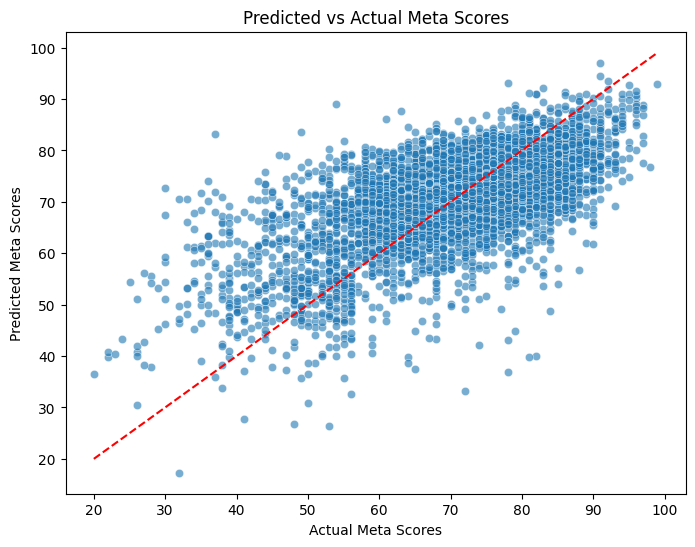

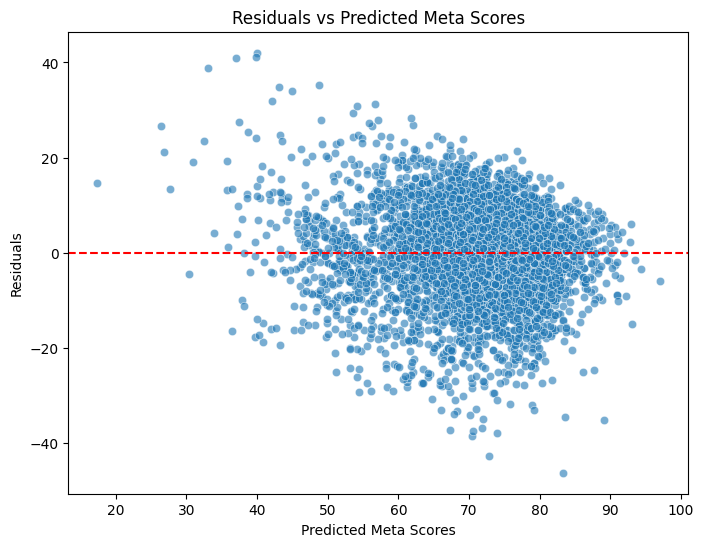

Model Performance Metrics:
MSE: 85.11133691066931
RMSE: 9.225580573095078
R2 Score: 0.4167362946895963


In [38]:
def xgboost_regressor(data, target_column, test_size=0.3, n_estimators=100, random_state=42):
    """
    XGBoost Regressor model for regression tasks.

    Parameters:
    data (pd.DataFrame): The input dataset containing features and the target column.
    target_column (str): The name of the target column (e.g., 'meta_score') for regression.
    test_size (float, optional): Proportion of the dataset to include in the test split. Default is 0.3.
    n_estimators (int, optional): Number of boosting rounds for XGBoost. Default is 100.
    random_state (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
    dict: A dictionary containing the Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
          and R-squared (R2 Score) of the model on the test set.
    """
    data = data.dropna(subset=[target_column])
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train = X_train.drop(columns=['name','release_date'], errors='ignore')
    X_test = X_test.drop(columns=['name','release_date'], errors='ignore')
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, random_state=random_state)
    xgb_regressor.fit(X_train, y_train)
    y_pred = xgb_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

    # Predicted vs Actual values Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
    plt.xlabel('Actual Meta Scores')
    plt.ylabel('Predicted Meta Scores')
    plt.title('Predicted vs Actual Meta Scores')
    plt.show()

    # Residuals (difference between actual and predicted values) Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Meta Scores')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Meta Scores')
    plt.show()

    return {"MSE": mse, "RMSE": rmse, "R2 Score": r2}


results = xgboost_regressor(data, 'meta_score')
print("Model Performance Metrics:")
print("MSE:", results['MSE'])
print("RMSE:", results['RMSE'])
print("R2 Score:", results['R2 Score'])

# **Results**

the model we did for this dataset we recieved an R2 score of 0.41, which is let us say....slightly down the expectations, but that is okay, the dataset we have chosen is actually missing very important features such as the game genre, the publisher, developer and more game-metrics that could determine the best option for the data, with this dataset, we can say this is the best, we just need more features to improve our work